In [3]:
import numpy as np

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# Input
x = np.array([3, 14])

# First layer weights and biases
W1 = np.array([
    [1, 0, -1],
    [0, 1, -1],
    [-1, 0, -1],
    [0, -1, -1]
])

# Second layer weights and biases
W2 = np.array([
    [1, 1, 1, 1, 0],
    [-1, -1, -1, -1, 2]
])

# Calculate z values
z = np.dot(W1[:, :2], x) + W1[:, 2]

# Apply ReLU activation
f_z = relu(z)

# Calculate u values
u = np.dot(W2[:, :4], f_z) + W2[:, 4]

# Apply ReLU activation
f_u = relu(u)

# Apply softmax to get final output
output = softmax(f_u)

print("z values:", z)
print("f(z) values:", f_z)
print("u values:", u)
print("f(u) values:", f_u)
print("Final output (o1, o2):", output)

z values: [  2  13  -4 -15]
f(z) values: [ 2 13  0  0]
u values: [ 15 -13]
f(u) values: [15  0]
Final output (o1, o2): [9.99999694e-01 3.05902227e-07]


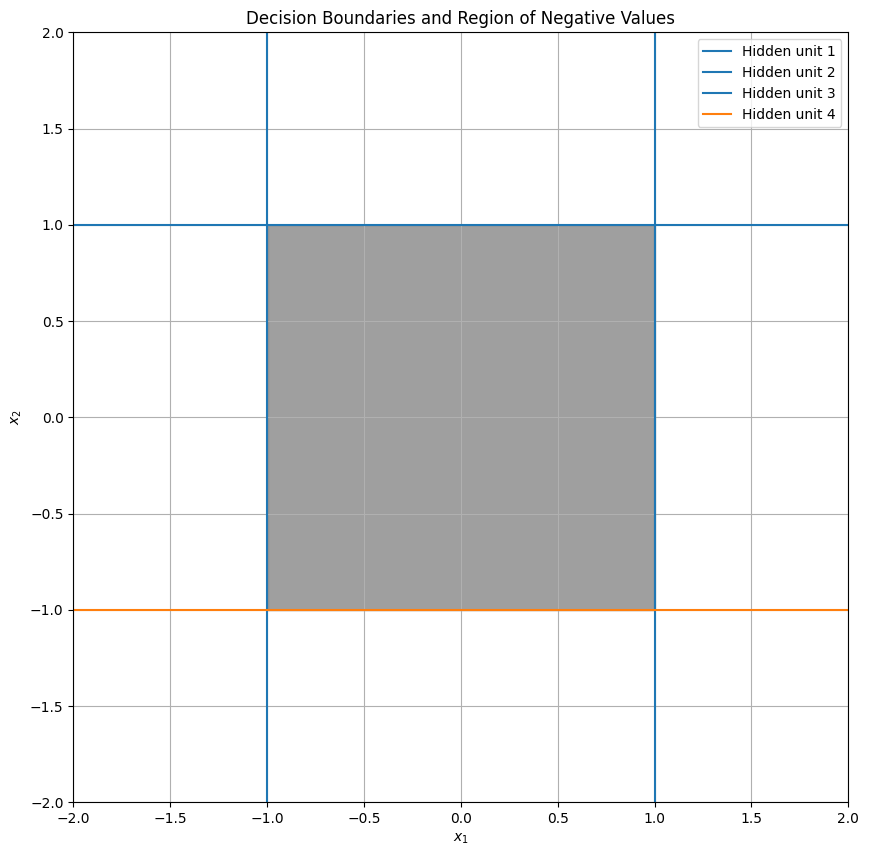

In [4]:
#2. LSTM
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundaries_and_region(W1):
    # Define the range of x1 and x2 values
    x1_vals = np.linspace(-2, 2, 400)
    
    # Initialize the plot
    plt.figure(figsize=(10, 10))
    
    # Plot each decision boundary
    for i in range(W1.shape[0]):
        w = W1[i, :2]
        b = W1[i, 2]
        
        # Compute the corresponding x2 values for each x1
        if w[1] != 0:
            x2_vals = -(w[0] * x1_vals + b) / w[1]
            plt.plot(x1_vals, x2_vals, label=f'Hidden unit {i+1}')
        else:
            plt.axvline(-b / w[0], label=f'Hidden unit {i+1}')
    
    # Shade the region where all conditions are met
    plt.fill_between(x1_vals, -1, 1, where=((x1_vals > -1) & (x1_vals < 1)), color='gray', alpha=0.5)
    plt.fill_between([-1, 1], -1, 1, color='gray', alpha=0.5)
    
    # Set plot limits and labels
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Decision Boundaries and Region of Negative Values')
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

# Define weights for the first layer
W1 = np.array([
    [1, 0, -1],
    [0, 1, -1],
    [-1, 0, -1],
    [0, -1, -1]
])

# Plot the decision boundaries and shaded region
plot_decision_boundaries_and_region(W1)


In [9]:
def output_1(sum_f):
    f_u1 = np.maximum(0, sum_f)
    f_u2 = np.maximum(0, -sum_f + 2)
    
    exp_f_u1 = np.exp(f_u1)
    exp_f_u2 = np.exp(f_u2)
    
    out = exp_f_u1 / (exp_f_u1 + exp_f_u2)
    return out

print(output_1(3))


0.9525741268224333


In [13]:
import numpy as np

def sigmoid(x):
    if x>=1:
        return 1
    elif x<=-1:
        return 0
    else:
        return 1 / (1 + np.exp(-x))

def tanh(x):
    if x>=1:
        return 1
    elif x<=-1:
        return -1
    else:
        return np.tanh(x)

def lstm_unit(x_seq):
    # Parameters
    W_fh, W_fx, b_f, W_ch = 0, 0, -100, -100
    W_ih, W_ix, b_i, W_cx = 0, 100, 100, 50
    W_oh, W_ox, b_o, b_c = 0, 100, 0, 0

    # Initial conditions
    h_t = 0
    c_t = 0
    
    h_states = []

    # Iterate over the input sequence
    for x_t in x_seq:
        # Forget gate
        f_t = sigmoid(W_fh * h_t + W_fx * x_t + b_f)
        
        # Input gate
        i_t = sigmoid(W_ih * h_t + W_ix * x_t + b_i)
        
        # Output gate
        o_t = sigmoid(W_oh * h_t + W_ox * x_t + b_o)
        
        # Cell candidate
        c_hat_t = tanh(W_ch * h_t + W_cx * x_t + b_c)
        
        # Cell state
        c_t = f_t * c_t + i_t * c_hat_t
        
        # Hidden state
        h_t = np.rint(o_t * tanh(c_t))
        
        # Store the hidden state
        h_states.append(h_t)
    
    return h_states

# Input sequence
input_sequence = [1, 1, 0, 1, 1]

# Compute the hidden states
hidden_states = lstm_unit(input_sequence)

# Print the hidden states at each time step
for t, h in enumerate(hidden_states):
    print(f'h_{t}: {h}')


h_0: 1.0
h_1: -1.0
h_2: 0.0
h_3: 1.0
h_4: -1.0


In [16]:
import numpy as np

# Define the quadratic loss function
def quadratic_loss(y_pred, y_true):
    return 0.5 * (y_pred - y_true)**2

# Define the sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Model parameters
x = 3       # Input
t = 1       # Target value

w1 = 0.01   # Weight of the first layer
w2 = -5     # Weight of the second layer
b = -1      # Bias

# Forward pass
z1 = w1 * x 
a1 = sigmoid(z1)

z2 = w2 * a1 + b
y_pred = sigmoid(z2)

# Compute loss
loss = quadratic_loss(y_pred, t)
print(f"Loss: {loss}")

# Backward pass - Compute gradients
# Derivative of loss with respect to y_pred
d_loss_y_pred = y_pred - t

# Derivative of y_pred with respect to z2
d_y_pred_z2 = y_pred * (1 - y_pred)

# Derivative of z2 with respect to w2
d_z2_w2 = a1

# Derivative of z2 with respect to b (bias)
d_z2_b = 1

# Derivative of z2 with respect to a1
d_z2_a1 = w2

# Derivative of a1 with respect to z1
d_a1_z1 = sigmoid_derivative(z1)

# Derivative of z1 with respect to w1
d_z1_w1 = x

# Derivative of loss with respect to w1
d_loss_w1 = d_loss_y_pred * d_y_pred_z2 * d_z2_a1 * d_a1_z1 * d_z1_w1

# Derivative of loss with respect to w2
d_loss_w2 = d_loss_y_pred * d_y_pred_z2 * d_z2_w2

# Derivative of loss with respect to b (bias)
d_loss_b = d_loss_y_pred * d_y_pred_z2 * d_z2_b

# Print derivatives
print(f"Derivative of Loss with respect to w1: {d_loss_w1}")
print(f"Derivative of Loss with respect to w2: {d_loss_w2}")
print(f"Derivative of Loss with respect to b: {d_loss_b}")


Loss: 0.4721354784956999
Derivative of Loss with respect to w1: 0.10006057520877337
Derivative of Loss with respect to w2: -0.013544563240176716
Derivative of Loss with respect to b: -0.026688824140471523
